# Details:

* The data was imported from Kaggle (https://www.kaggle.com/majedalhulayel/riyadh-marathon-2022-results-saudi-arabia)
* It is a quick analysis on the Riyadh Marathon results.

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r'C:\Users\ASUS\Desktop\ICS 104\Data Science Stuff\Riyadh Marathon\Riyadh Marathon Results.csv')

del df['Unnamed: 0']
df

,Rank,Gender Rank,Name,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance
0,46 / 2285,1 / 761,6b848725-e44d-42d8-a278-ae67faa9cb80,Female,10KM RUN,[img:flags/SA.gif],00:42:59.556,00:42:57.505,13.9 Km/Hr,4:17 min/km,10 KM
1,53 / 2285,2 / 761,6b848725-e44d-42d8-a278-ae67faa9cb80,Female,10KM RUN,[img:flags/CZ.gif],00:43:28.175,00:43:24.774,13.8 Km/Hr,4:20 min/km,10 KM
2,55 / 2285,3 / 761,6b848725-e44d-42d8-a278-ae67faa9cb80,Female,10KM RUN,[img:flags/SA.gif],00:44:00.251,00:43:56.317,13.6 Km/Hr,4:23 min/km,10 KM
3,88 / 2285,4 / 761,6b848725-e44d-42d8-a278-ae67faa9cb80,Female,10KM RUN,[img:flags/MA.gif],00:48:28.115,00:48:22.908,12.4 Km/Hr,4:50 min/km,10 KM
4,93 / 2285,5 / 761,6b848725-e44d-42d8-a278-ae67faa9cb80,Female,10KM RUN,[img:flags/SA.gif],00:58:37.753,00:48:27.714,12.3 Km/Hr,4:50 min/km,10 KM
...,...,...,...,...,...,...,...,...,...,...,...
6392,5 / 6,2 / 3,cde359f8-5d73-4426-8ba6-cf021cfddbfc,Female,HALF MARATHON ELITE,[img:flags/ET.gif],01:12:12.475,01:12:08.442,17.5 Km/Hr,3:25 min/km,21.1 KM
6393,6 / 6,3 / 3,cde359f8-5d73-4426-8ba6-cf021cfddbfc,Female,HALF MARATHON ELITE,[img:flags/UA.gif],01:18:23.645,01:18:20.056,16.1 Km/Hr,3:42 min/km,21.1 KM
6394,1 / 6,1 / 3,7aa1ce03-6d9c-4b53-93a9-d01b1bae7334,Male,HALF MARATHON ELITE,[img:flags/KE.gif],01:04:04.250,01:04:00.497,19.7 Km/Hr,3:02 min/km,21.1 KM
6395,2 / 6,2 / 3,7aa1ce03-6d9c-4b53-93a9-d01b1bae7334,Male,HALF MARATHON ELITE,[img:flags/KE.gif],01:04:06.571,01:04:03.202,19.7 Km/Hr,3:02 min/km,21.1 KM


In [3]:
df.isna().sum()

Rank             0
Gender Rank      0
Name             0
Gender           0
Category         0
Nationality    312
Gun Time         0
Chip Time      170
Speed          170
Pace           170
Distance         0
dtype: int64

-------------------------------------------------
Percentage of null values for each column
-------------------------------------------------



<AxesSubplot:>

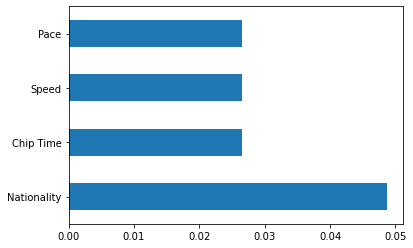

In [4]:
print('-------------------------------------------------')
print('Percentage of null values for each column')
print('-------------------------------------------------')
print()

percentage_missing_values = df.isnull().sum()/len(df)

percentage_only_missing_values = percentage_missing_values[percentage_missing_values != 0]

percentage_only_missing_values.plot(kind='barh')

In [5]:
df.columns

Index(['Rank', 'Gender Rank', 'Name', 'Gender', 'Category', 'Nationality',
       'Gun Time', 'Chip Time', 'Speed', 'Pace', 'Distance'],
      dtype='object')

In [6]:
categories = df.Category.unique()



def percentage (category):
    x = df[df['Category']==category]
    percentageFemale = round((len(x[x['Gender'] == 'Female'])/len(x)),2)
    percentageMale = round((len(x[x['Gender'] == 'Male'])/len(x)),2)
    return percentageFemale, percentageMale

y=0
for x in categories:
    print('Females are', percentage(x)[0],'of all participants in',categories[y], 'while Males are', percentage(x)[1])
    y+=1





Females are 0.33 of all participants in 10KM RUN while Males are 0.67
Females are 0.47 of all participants in 4KM FUN RUN while Males are 0.53
Females are 0.2 of all participants in HALF MARATHON while Males are 0.8
Females are 0.14 of all participants in MARATHON while Males are 0.86
Females are 0.41 of all participants in MARATHON ELITE while Males are 0.59
Females are 0.5 of all participants in HALF MARATHON ELITE while Males are 0.5


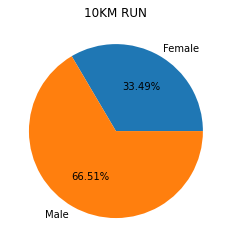

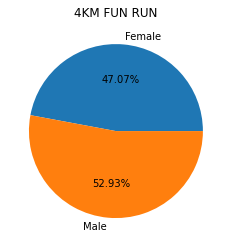

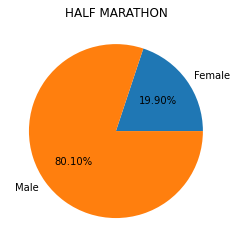

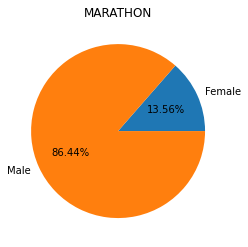

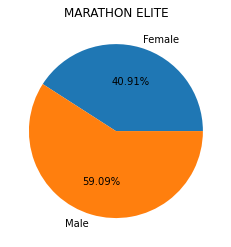

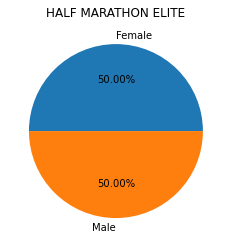

In [7]:
def piechart (category):
    x = df[df['Category']==category]
    cat_arr = np.array(x['Gender'])

    gender_labels, gender_counts = np.unique(x['Gender'],return_counts=True)


    plt.figure()
    plt.pie(gender_counts, labels = gender_labels,autopct='%.2f%%') #autopct to format labels
    plt.title(category)
    plt.show()


for x in categories:
    piechart(x)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6397 entries, 0 to 6396
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         6397 non-null   object
 1   Gender Rank  6397 non-null   object
 2   Name         6397 non-null   object
 3   Gender       6397 non-null   object
 4   Category     6397 non-null   object
 5   Nationality  6085 non-null   object
 6   Gun Time     6397 non-null   object
 7   Chip Time    6227 non-null   object
 8   Speed        6227 non-null   object
 9   Pace         6227 non-null   object
 10  Distance     6397 non-null   object
dtypes: object(11)
memory usage: 549.9+ KB


In [9]:
df['Chip Time'] = pd.to_timedelta(df['Chip Time'])

In [10]:
df['Pace'] = df['Pace'].apply(lambda x: str(x))

df['Pace'] = df['Pace'].apply(lambda x: x.split(' ')[0].replace(':','.'))

df = df.rename(columns={'Pace': 'Pace (min/km)'})

In [11]:
df

,Rank,Gender Rank,Name,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace (min/km),Distance
0,46 / 2285,1 / 761,6b848725-e44d-42d8-a278-ae67faa9cb80,Female,10KM RUN,[img:flags/SA.gif],00:42:59.556,0 days 00:42:57.505000,13.9 Km/Hr,4.17,10 KM
1,53 / 2285,2 / 761,6b848725-e44d-42d8-a278-ae67faa9cb80,Female,10KM RUN,[img:flags/CZ.gif],00:43:28.175,0 days 00:43:24.774000,13.8 Km/Hr,4.20,10 KM
2,55 / 2285,3 / 761,6b848725-e44d-42d8-a278-ae67faa9cb80,Female,10KM RUN,[img:flags/SA.gif],00:44:00.251,0 days 00:43:56.317000,13.6 Km/Hr,4.23,10 KM
3,88 / 2285,4 / 761,6b848725-e44d-42d8-a278-ae67faa9cb80,Female,10KM RUN,[img:flags/MA.gif],00:48:28.115,0 days 00:48:22.908000,12.4 Km/Hr,4.50,10 KM
4,93 / 2285,5 / 761,6b848725-e44d-42d8-a278-ae67faa9cb80,Female,10KM RUN,[img:flags/SA.gif],00:58:37.753,0 days 00:48:27.714000,12.3 Km/Hr,4.50,10 KM
...,...,...,...,...,...,...,...,...,...,...,...
6392,5 / 6,2 / 3,cde359f8-5d73-4426-8ba6-cf021cfddbfc,Female,HALF MARATHON ELITE,[img:flags/ET.gif],01:12:12.475,0 days 01:12:08.442000,17.5 Km/Hr,3.25,21.1 KM
6393,6 / 6,3 / 3,cde359f8-5d73-4426-8ba6-cf021cfddbfc,Female,HALF MARATHON ELITE,[img:flags/UA.gif],01:18:23.645,0 days 01:18:20.056000,16.1 Km/Hr,3.42,21.1 KM
6394,1 / 6,1 / 3,7aa1ce03-6d9c-4b53-93a9-d01b1bae7334,Male,HALF MARATHON ELITE,[img:flags/KE.gif],01:04:04.250,0 days 01:04:00.497000,19.7 Km/Hr,3.02,21.1 KM
6395,2 / 6,2 / 3,7aa1ce03-6d9c-4b53-93a9-d01b1bae7334,Male,HALF MARATHON ELITE,[img:flags/KE.gif],01:04:06.571,0 days 01:04:03.202000,19.7 Km/Hr,3.02,21.1 KM


# The distribution of participants' paces

* All participants (males and females)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


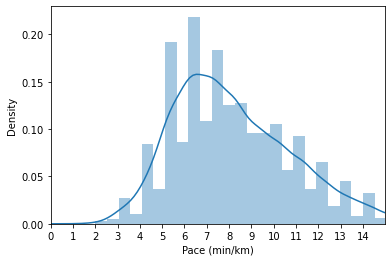

In [21]:
fig, ax = plt.subplots()
sns.distplot(df['Pace (min/km)'], ax=ax) 
ax.set_xlim(0,15)
ax.set_xticks(range(0,15))
plt.show()


* Male participants pace distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


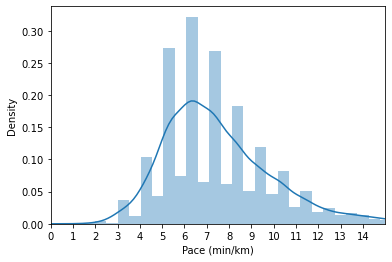

In [26]:
men = df[df['Gender'] == 'Male']['Pace (min/km)']

fig, ax = plt.subplots()
sns.distplot(men, ax=ax) 
ax.set_xlim(0,15)
ax.set_xticks(range(0,15))
plt.show()

* Female participants pace distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


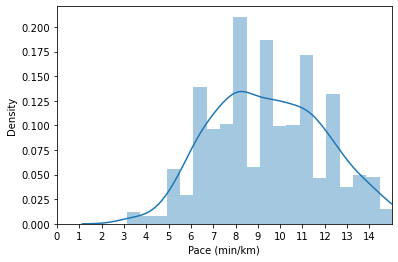

In [27]:
female = df[df['Gender'] == 'Female']['Pace (min/km)']

fig, ax = plt.subplots()
sns.distplot(female, ax=ax) 
ax.set_xlim(0,15)
ax.set_xticks(range(0,15))
plt.show()